In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

## Data Preparation

### Data Loading

In [2]:
data = pd.read_csv('Leads.csv')
data.head() 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data Inspection

In [3]:
data.shape

(9240, 37)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [5]:
#Replacing all the Select values to NULL's since there was nothig selected by customer.
data = data.replace('Select', np.nan)

In [6]:
round(100*(data.isnull().sum()/len(data.index)),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

In [7]:
# Drop the columns having more than 70% os NULL values.
data = data.loc[:, data.isnull().mean() < .70]

#### Now we will take care of null values in each column one by one.

In [8]:
cols_null_cat = []
cols_null_num = []
for col in list(data.columns[data.isnull().any()]):     
    if (data[col].dtype) == 'O':
        cols_null_cat.append(col)
    else:
        cols_null_num.append(col)
        
print(cols_null_cat)
print(cols_null_num)

['Lead Source', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
['TotalVisits', 'Page Views Per Visit', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


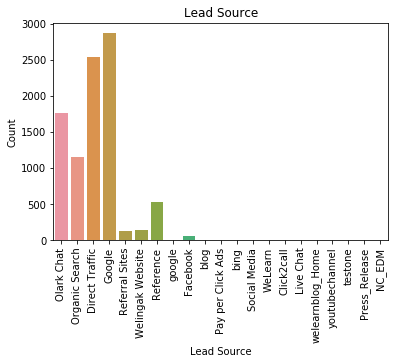

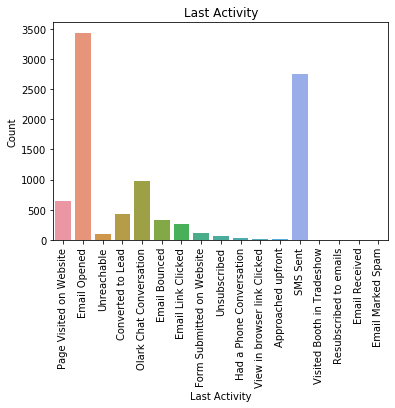

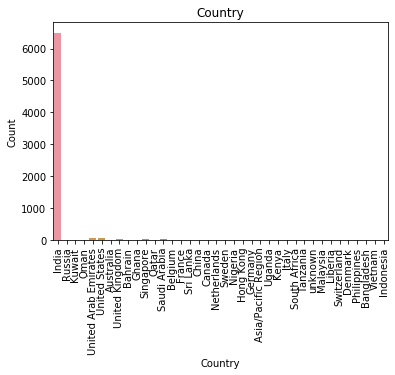

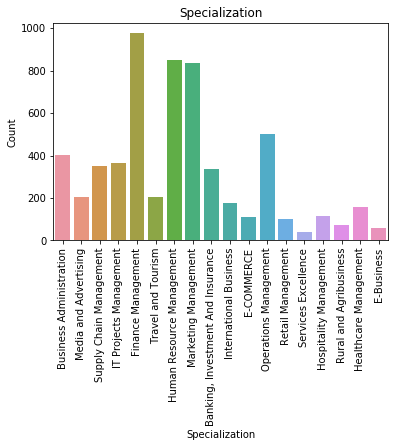

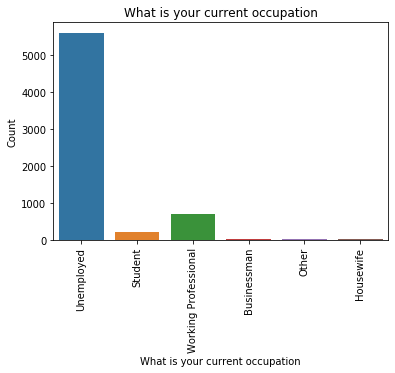

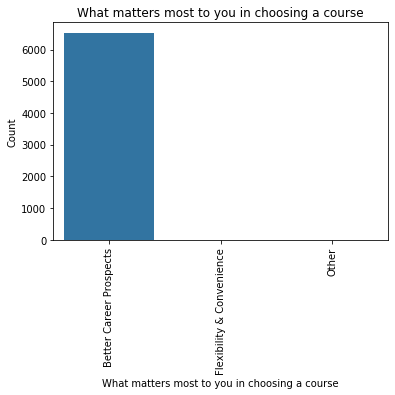

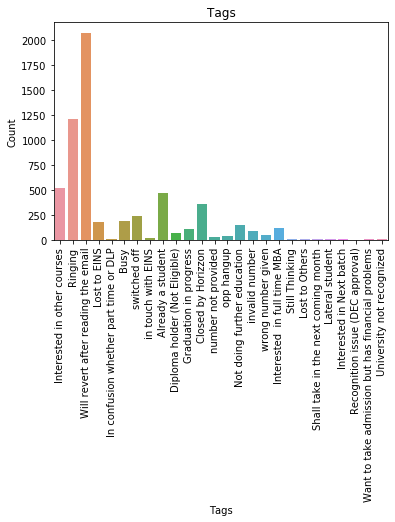

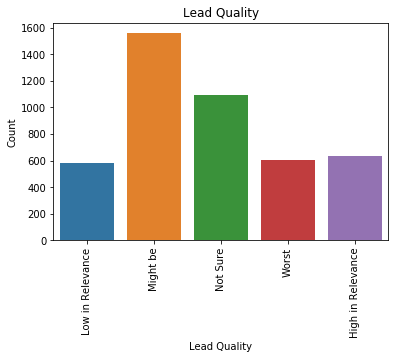

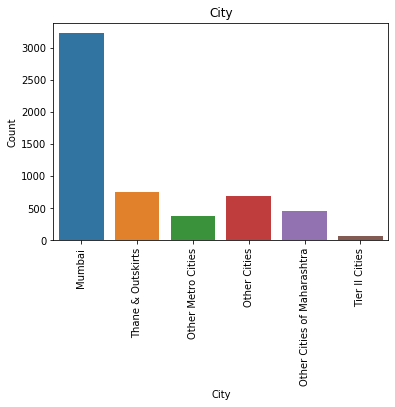

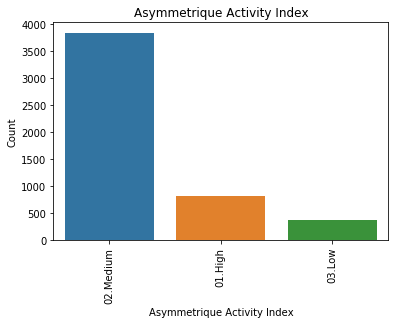

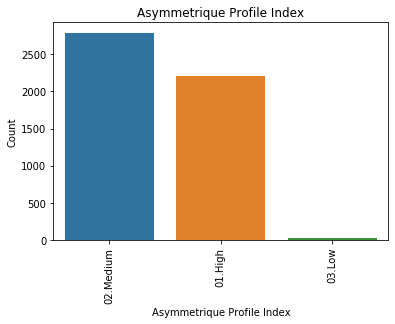

In [9]:
for i in cols_null_cat:
    sns.countplot(x= i, data = data)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

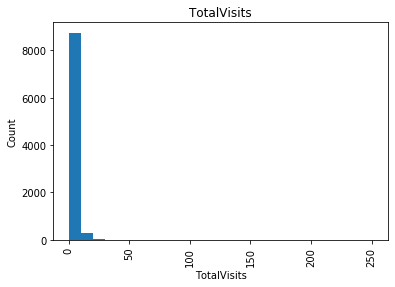

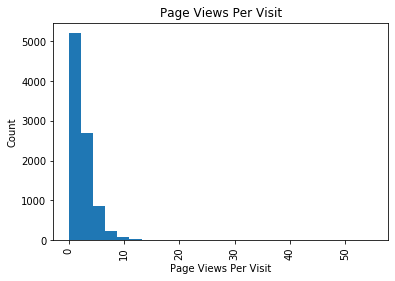

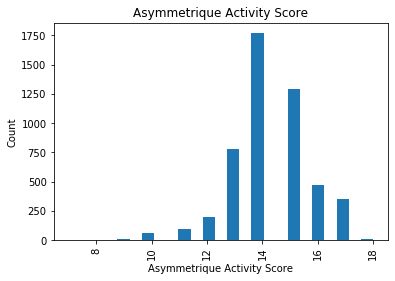

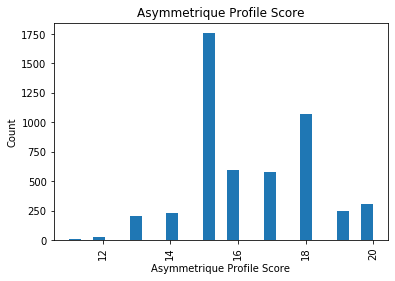

In [10]:
for i in cols_null_num:
    data[i].plot.hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

In [11]:
# Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead
for fet in list(data.columns[data.isnull().any()]):
    print(data[fet].describe())
    print('*********************************')

count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object
*********************************
count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64
*********************************
count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64
*********************************
count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object
*********************************
count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object
*********************************
count                   5860
unique                    18
top       Finance Management
freq     

#### Imputing NULLS for below columns.
 - Lead Quality - Replacing NULLS with 'Not Sure'.
 - City - Around 60% of the data is Mumbai, replacing NULLS with Mumbai.
 - Specialization - Replacing NULL with 'Others'.
 - Tags - 50% of the data is 'Will revert after reading the email', replacing NULLS with it. 
 - What matters most to you in choosing a course - 99% of the data is 'Better Career Prospects',replacing NULLS for it.
 - What is your current occupation - 86% of the data is Unemployed, replacing NULLS with it. 
 - Country - Aroun95% of the data is India, replacing NULLS with the same.
 - Asymmetrique Activity Index - Aroun76% of the data is 02.Medium, replacing NULLS with the same.
 - Asymmetrique Profile Index - Aroun55% of the data is 02.Medium, replacing NULLS with the same.
 - Asymmetrique Activity Score - Impute Nulls with Median since data is not normally distributed.
 - Asymmetrique Profile Score - Impute Nulls with Median since data is not normally distributed.
 - For rest all columns we will simply drop the rows since null percentage is less than 2%.

In [12]:
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')
data['City'] = data['City'].replace(np.nan, data['City'].mode()[0])
data['Specialization'] = data['Specialization'].replace(np.nan, 'Others')
data['Tags'] = data['Tags'].replace(np.nan, data['Tags'].mode()[0])
data['What matters most to you in choosing a course'] = data['What matters most to you in choosing a course'].replace(np.nan, data['What matters most to you in choosing a course'].mode()[0])
data['What is your current occupation'] = data['What is your current occupation'].replace(np.nan, data['What is your current occupation'].mode()[0])
data['Country'] = data['Country'].replace(np.nan, data['Country'].mode()[0])
data['Asymmetrique Activity Index'] = data['Asymmetrique Activity Index'].replace(np.nan, data['Asymmetrique Activity Index'].mode()[0])
data['Asymmetrique Profile Index'] = data['Asymmetrique Profile Index'].replace(np.nan, data['Asymmetrique Profile Index'].mode()[0])
data['Asymmetrique Activity Score'] = data['Asymmetrique Activity Score'].replace(np.nan, data['Asymmetrique Activity Score'].median())
data['Asymmetrique Profile Score'] = data['Asymmetrique Profile Score'].replace(np.nan, data['Asymmetrique Profile Score'].median())

In [13]:
# Rest missing values are under 2% so we can drop these rows.
data.dropna(inplace = True)

In [14]:
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

### Exploratory Data Analytics.

#### Lead Origin

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

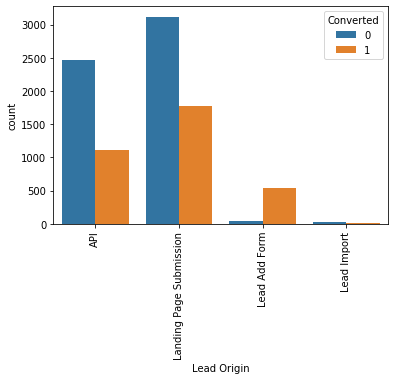

In [15]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
2. Lead Add Form has more than 90% conversion rate but count of lead are not very high.
3. Lead Import are very less in count.<br>


__To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.__

### Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

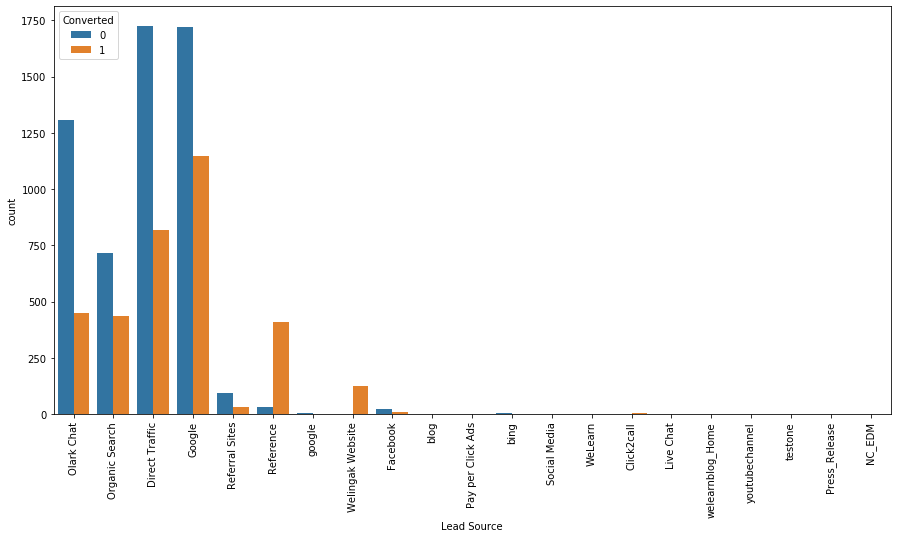

In [16]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

In [17]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

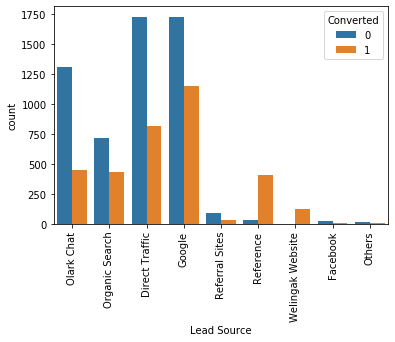

In [18]:
sns.countplot(x = "Lead Source", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Google and Direct traffic generates maximum number of leads.
2. Conversion Rate of reference leads and leads through welingak website is high.

__To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google  leads and generate more leads from reference and welingak website.__

### Do Not Email & Do Not Call

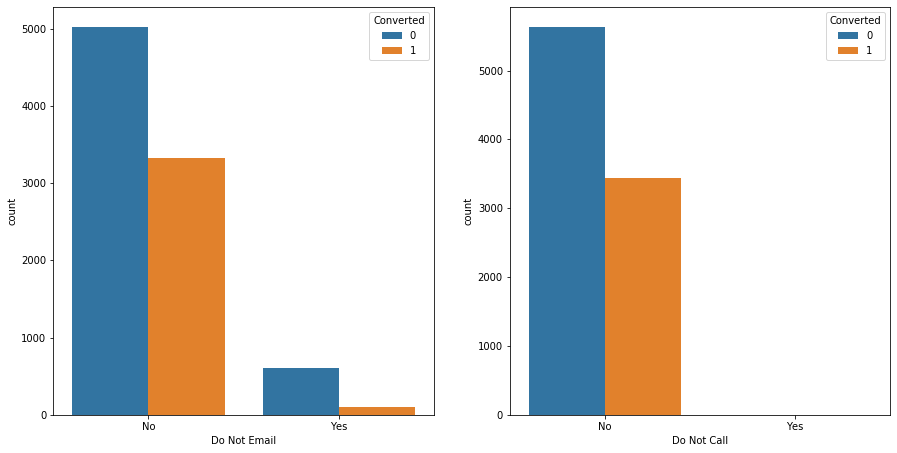

In [19]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = data, ax = axs[1])

### Total Visits

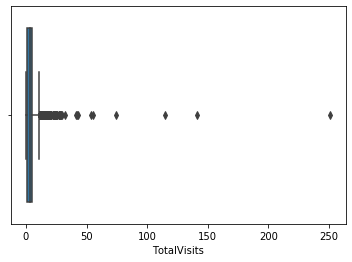

In [20]:
sns.boxplot(data['TotalVisits'])

In [21]:
# As we can see there are a number of outliers in the data.# We will cap the outliers to 95% value for analysis.
percentiles = data['TotalVisits'].quantile([0.05,0.95]).values
data['TotalVisits'][data['TotalVisits'] <= percentiles[0]] = percentiles[0]
data['TotalVisits'][data['TotalVisits'] >= percentiles[1]] = percentiles[1]

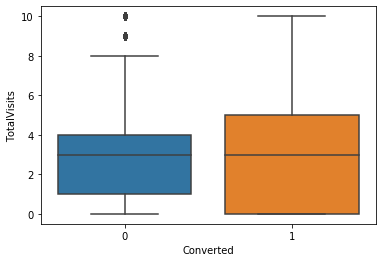

In [22]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = data)

#### Inference
1. Median for converted and not converted leads are the same.

__Nothng conclusive can be said on the basis of Total Visits.__

### Total time spent on website

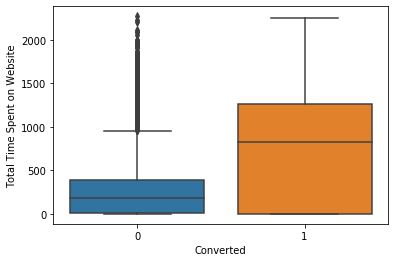

In [23]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = data)

#### Inference
1. Leads spending more time on the weblise are more likely to be converted.

__Website should be made more engaging to make leads spend more time.__

### Page views per visit

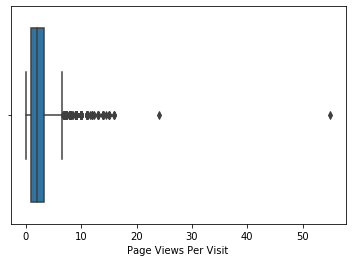

In [24]:
sns.boxplot(data['Page Views Per Visit'])

In [25]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = data['Page Views Per Visit'].quantile([0.05,0.95]).values
data['Page Views Per Visit'][data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
data['Page Views Per Visit'][data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

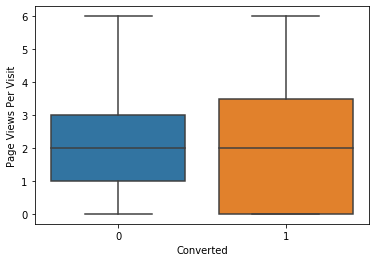

In [26]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = data)

#### Inference - Median for converted and unconverted leads is the same.Nothing can be said specifically for lead conversion from Page Views Per Visit.

### Last Activity

In [27]:
data['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

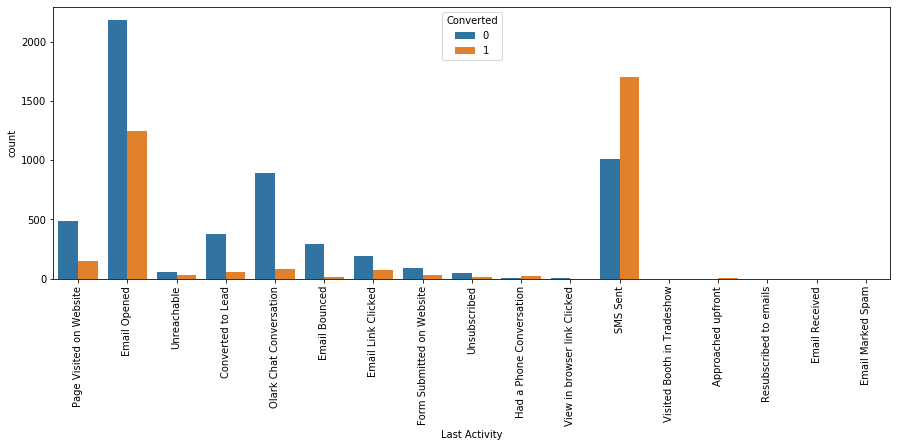

In [28]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

In [29]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Last Activity'] = data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

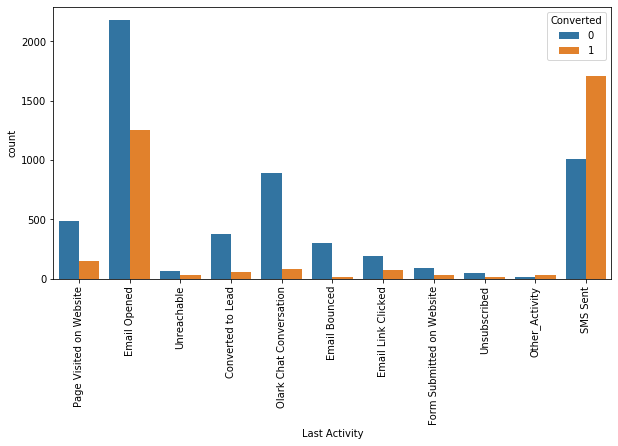

In [30]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = data)
xticks(rotation = 90)

#### Inference
1. Most of the lead have their Email opened as their last activity.
2. Conversion rate for leads with last activity as SMS Sent is almost 60%.b

### Occupation

In [31]:
data['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

In [32]:
data['What is your current occupation'] = data['What is your current occupation'].replace(['Other'], 'Other_Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

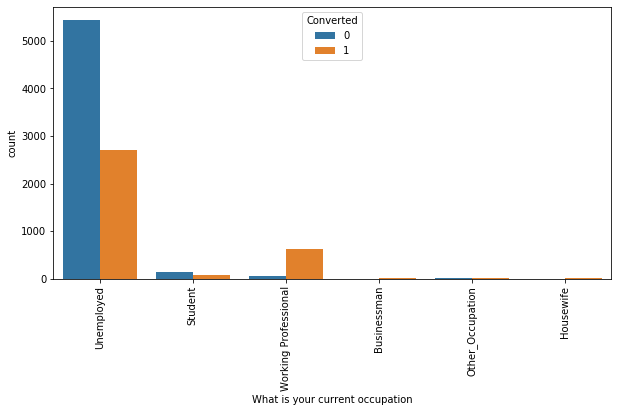

In [33]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = data)
xticks(rotation = 90)

 ### Inference
1. Working Professionals going for the course have high chances of joining it.
2. Unemployed leads are the most in numbers but has around 30-35% conversion rate.

#### Tags

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object
**********************


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

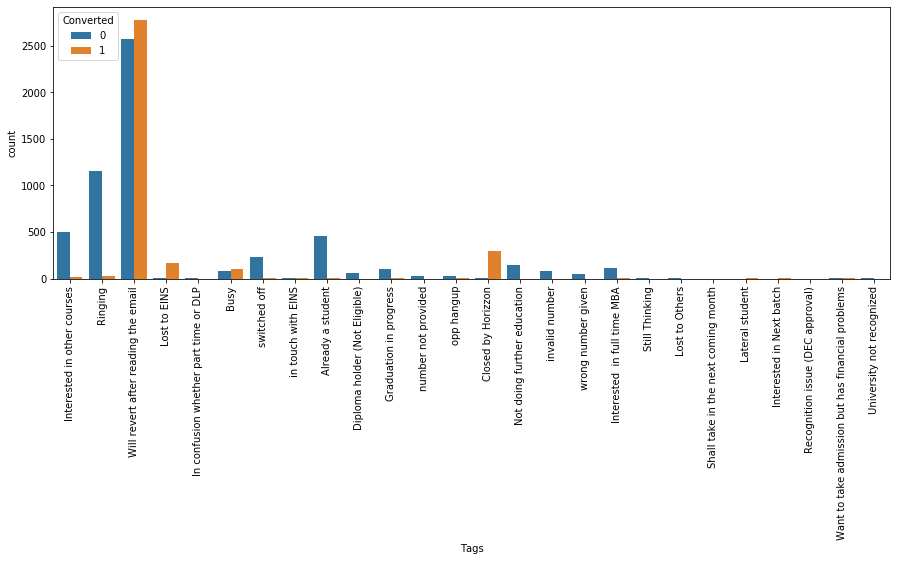

In [34]:
print(data.Tags.describe())
print('**********************')
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

In [35]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

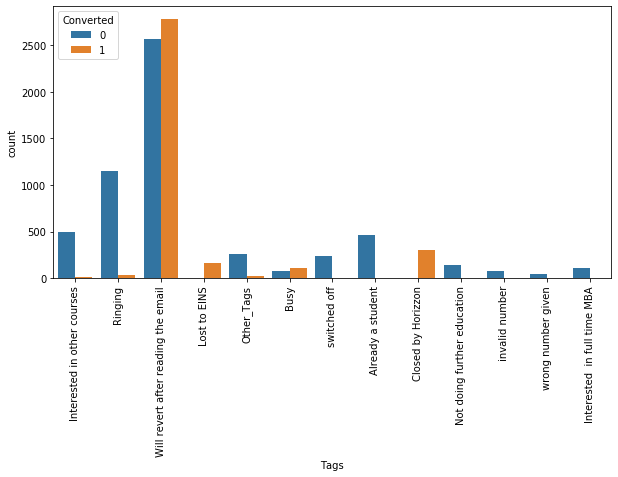

In [36]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = data)
xticks(rotation = 90)

### Inference

### Lead Quality

In [37]:
data['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

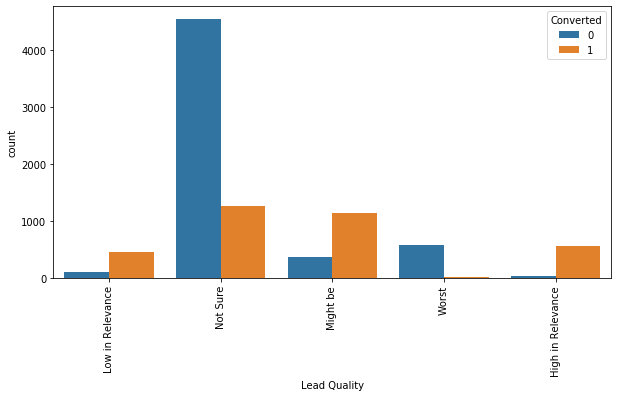

In [38]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = data)
xticks(rotation = 90)

### City

In [39]:
data.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

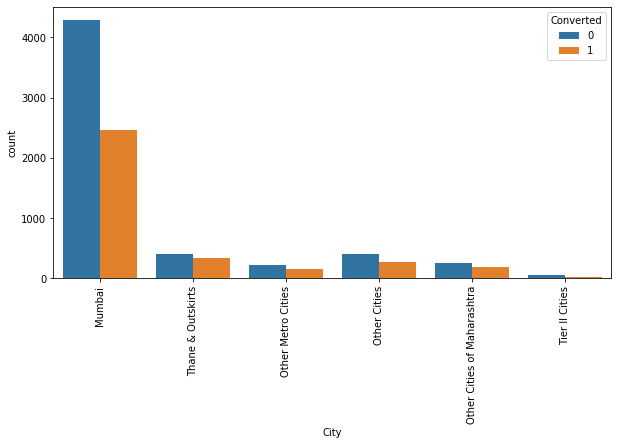

In [40]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = data)
xticks(rotation = 90)

### Inference
Most leads are from mumbai with around 30% conversion rate.

### Last Notable Activity

In [41]:
data['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

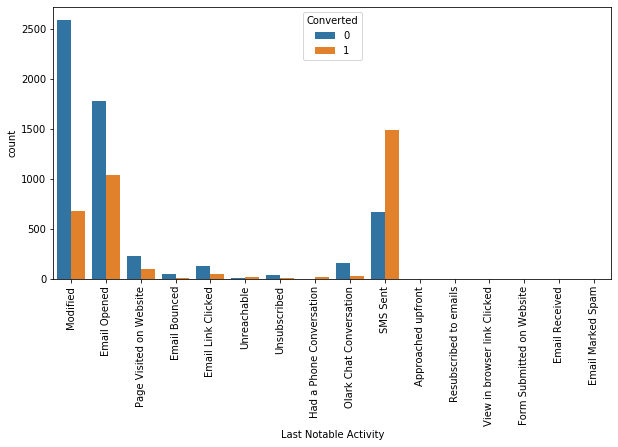

In [42]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

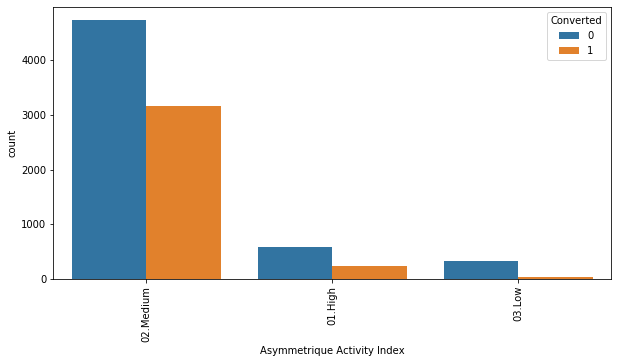

In [43]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Asymmetrique Activity Index", hue = "Converted", data = data)
xticks(rotation = 90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

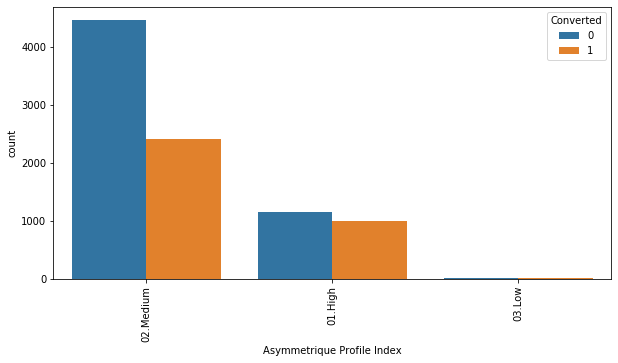

In [44]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Asymmetrique Profile Index", hue = "Converted", data = data)
xticks(rotation = 90)

#### Columns below doesnot give much information as most of them are having NO as values. And hence no inference can be drawn from these columns.
 - Search
 - Magazine
 - Newspaper Article
 - X Education Forums
 - Newspaper
 - Digital Advertisement
 - Through Recommendations
 - Receive More Updates About Our Courses
 - Update me on Supply Chain Content
 - Get updates on DM Content
 - I agree to pay the amount through cheque
 - A free copy of Mastering The Interview

In [45]:
print(data.Search.describe())
print('**********************')
print(data.Magazine.describe())
print('**********************')
print(data['Newspaper Article'].describe())
print('**********************')
print(data['X Education Forums'].describe())
print('**********************')
print(data['Newspaper'].describe())
print('**********************')
print(data['Digital Advertisement'].describe())
print('**********************')
print(data['Through Recommendations'].describe())
print('**********************')
print(data['Receive More Updates About Our Courses'].describe())
print('**********************')
print(data['Update me on Supply Chain Content'].describe())
print('**********************')
print(data['Get updates on DM Content'].describe())
print('**********************')
print(data['I agree to pay the amount through cheque'].describe())
print('**********************')
print(data['A free copy of Mastering The Interview'].describe())

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object
**********************
count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object
**********************
count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object
**********************
count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object
**********************
count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object
**********************
count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object
**********************
count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object
**********************
count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object
**********************
count     9074
uniqu

#### Country

In [46]:
data.Country.describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

##### Inference - Most values are 'India' no such inference can be drawn

#### What matters most to you in choosing a course

In [47]:
data['What matters most to you in choosing a course'].describe()


count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

##### Inference - Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

### Results - Based on the EDA analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [48]:
data = data.drop(['Lead Number',
                  'What matters most to you in choosing a course',
                  'Search','Magazine',
                  'Newspaper Article',
                  'X Education Forums',
                  'Newspaper',
                  'Digital Advertisement',
                  'Through Recommendations',
                  'Receive More Updates About Our Courses',
                  'Update me on Supply Chain Content',
                  'Get updates on DM Content',
                  'I agree to pay the amount through cheque',
                  'A free copy of Mastering The Interview',
                  'Country'],1)

In [49]:
data.shape

(9074, 20)

In [50]:
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,02.Medium,02.Medium,15.0,15.0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,02.Medium,15.0,15.0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,02.Medium,01.High,15.0,18.0,Modified


### Data Preparation

#### Converting some binary variables (Yes/No) to 1/0

In [51]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity','Asymmetrique Activity Index','Asymmetrique Profile Index']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [53]:
# Adding the results to the master dataframe
data = pd.concat([data, dummy1], axis=1)
data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,...,0,0,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,...,0,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,...,0,0,0,0,0,0,1,0,0,0


In [54]:
data = data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity','Asymmetrique Activity Index','Asymmetrique Profile Index'], axis = 1)

In [55]:
data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,15.0,15.0,0,...,0,0,0,0,0,0,1,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,15.0,15.0,0,...,0,0,0,0,0,0,1,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,14.0,20.0,1,...,0,0,0,0,0,0,1,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,13.0,17.0,1,...,0,0,0,0,0,0,1,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,15.0,18.0,1,...,0,0,0,0,0,0,1,0,0,0


In [56]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = data.drop(['Prospect ID','Converted'], axis=1)

In [57]:
# Putting response variable to y
y = data['Converted']

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
         'Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
                                                                                                     'Asymmetrique Activity Score','Asymmetrique Profile Score']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
3009,0,0,-0.432779,-0.160255,-0.155018,-0.159171,-0.134368,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1012,1,0,-0.432779,-0.540048,-0.155018,-1.132123,1.365405,1,0,0,...,0,0,0,0,0,0,1,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,1.786733,-0.884254,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4750,0,0,-0.432779,1.643304,-0.155018,-0.159171,-0.134368,1,0,0,...,0,0,1,0,0,0,1,0,1,0
7987,0,0,0.643547,2.017593,0.122613,-0.159171,0.615518,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Model Building

#### Running Your First Training Model using RFE Feature Selection.

In [60]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_invalid number', 'Tags_switched off', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

##### Assessing the model with StatsModels

In [62]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1546.6
Date:                Wed, 19 Feb 2020   Deviance:                       3093.2
Time:                        12:10:28   Pearson chi2:                 2.92e+04
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5332      0.211     -7.261      0.000      -1.947      -1.119
Do Not Email                                -1.3981      0.211     -6.627      0.000      -1.812      -0.985
Lead Origin_Lead Add Form                    1.0558      0.368      2.869      0.004       0.334       1.777
Lead Source_Welingak Website                 3.3172      0.824      4.026      0.000       1.702       4.932
Last Activity_Olark Chat Conversation       -1.3600      0.185     -7.354      0.000      -1.722      -0.998
Tags_Busy                                    3.4770      0.328     10.613      0.000       2.835       4.119
Tags_Closed by Horizzon                      7.8262      0.775     10.094      0.000       6.307       9.346
Tags_Lost to EINS                            9.1006      0.763     11.921      0.000       7.604      10.597
Tags_Ringing                                -2.0157      0.336     -5.991      0.000      -2.675      -1.356
Tags_Will revert after reading the email     3.7549      0.227     16.514      0.000       3.309       4.201
Tags_invalid number                        -22.5623   1.33e+04     -0.002      0.999   -2.62e+04    2.61e+04
Tags_switched off                           -2.6694      0.588     -4.539      0.000      -3.822      -1.517
Lead Quality_Not Sure                       -3.4347      0.127    -26.948      0.000      -3.685      -3.185
Lead Quality_Worst                          -3.8739      0.839     -4.617      0.000      -5.518      -2.230
Last Notable Activity_SMS Sent               2.5883      0.123     21.095      0.000       2.348       2.829
Asymmetrique Activity Index_03.Low          -1.7000      0.357     -4.757      0.000      -2.400      -1.000
============================================================================================================
"""

In [63]:
col1 = col.drop('Tags_invalid number',1)

In [64]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1553.0
Date:                Wed, 19 Feb 2020   Deviance:                       3106.0
Time:                        12:10:28   Pearson chi2:                 2.90e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.6976      0.214     -7.943      0.000      -2.116      -1.279
Do Not Email                                -1.3867      0.210     -6.591      0.000      -1.799      -0.974
Lead Origin_Lead Add Form                    1.0909      0.370      2.945      0.003       0.365       1.817
Lead Source_Welingak Website                 3.2749      0.825      3.971      0.000       1.659       4.891
Last Activity_Olark Chat Conversation       -1.3625      0.185     -7.366      0.000      -1.725      -1.000
Tags_Busy                                    3.6606      0.327     11.200      0.000       3.020       4.301
Tags_Closed by Horizzon                      7.9806      0.776     10.284      0.000       6.460       9.501
Tags_Lost to EINS                            9.2573      0.764     12.115      0.000       7.760      10.755
Tags_Ringing                                -1.8175      0.335     -5.424      0.000      -2.474      -1.161
Tags_Will revert after reading the email     3.9212      0.229     17.113      0.000       3.472       4.370
Tags_switched off                           -2.4650      0.587     -4.199      0.000      -3.616      -1.314
Lead Quality_Not Sure                       -3.4291      0.127    -26.945      0.000      -3.678      -3.180
Lead Quality_Worst                          -3.8873      0.840     -4.630      0.000      -5.533      -2.242
Last Notable Activity_SMS Sent               2.5452      0.121     21.052      0.000       2.308       2.782
Asymmetrique Activity Index_03.Low          -1.6843      0.358     -4.704      0.000      -2.386      -0.983
============================================================================================================
"""

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)
#Calculating the Variance Inflation Factor
checkVIF(X_train_sm)

,Features,VIF
0,const,12.59
9,Tags_Will revert after reading the email,2.51
8,Tags_Ringing,1.87
12,Lead Quality_Worst,1.65
2,Lead Origin_Lead Add Form,1.50
11,Lead Quality_Not Sure,1.42
6,Tags_Closed by Horizzon,1.40
3,Lead Source_Welingak Website,1.34
13,Last Notable Activity_SMS Sent,1.20
10,Tags_switched off,1.19


In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.230507
1012    0.069645
9226    0.000963
4750    0.792456
7987    0.984182
1281    0.991581
2880    0.230507
4971    0.746328
7536    0.902351
1248    0.000963
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.30507492e-01, 6.96449826e-02, 9.63279143e-04, 7.92455792e-01,
       9.84182030e-01, 9.91581427e-01, 2.30507492e-01, 7.46328000e-01,
       9.02350684e-01, 9.63279143e-04])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [68]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Sl No.'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Sl No.
0,0,0.230507,3009
1,0,0.069645,1012
2,0,0.000963,9226
3,1,0.792456,4750
4,1,0.984182,7987


##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [69]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Sl No.,predicted
0,0,0.230507,3009,0
1,0,0.069645,1012,0
2,0,0.000963,9226,0
3,1,0.792456,4750,1
4,1,0.984182,7987,1


In [70]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3761  144]
 [ 368 2078]]


In [71]:
# Let's check the overall accuracy.
accuracy_05 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)
accuracy_05

0.9193827743662415

## Metrics beyond simply accuracy

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
sensitivity_05 = TP / float(TP+FN)
sensitivity_05

0.8495502861815208

In [74]:
# Let us calculate specificity
specificity_05 = TN / float(TN+FP)
specificity_05

0.963124199743918

In [75]:
# Calculate false postive rate - predicting churn when customer does not have churned
FPR_05 = (FP/ float(TN+FP))
FPR_05

0.03687580025608195

In [76]:
# positive predictive value 
PPV_05 = TP / float(TP+FP)
PPV_05

0.9351935193519352

In [77]:
# Negative predictive value
NPV_05 = TN / float(TN+ FN)
NPV_05

0.9108743037054977

In [78]:
from sklearn.metrics import precision_score, recall_score
precision_05 = precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
precision_05

0.9351935193519352

In [79]:
recall_05 = recall_score(y_train_pred_final.Converted , y_train_pred_final.predicted)
recall_05 

0.8495502861815208

### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [80]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

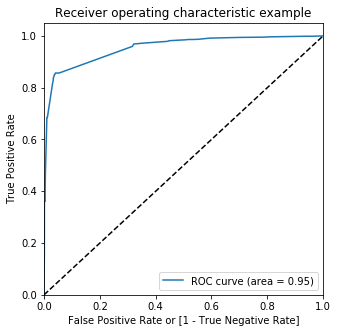

In [82]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Step 10: Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Sl No.,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.230507,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.069645,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.000963,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.792456,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.984182,7987,1,1,1,1,1,1,1,1,1,1,1


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.774839  0.971791  0.651472
0.2   0.2  0.789954  0.959526  0.683739
0.3   0.3  0.919540  0.856909  0.958771
0.4   0.4  0.920013  0.855683  0.960307
0.5   0.5  0.919383  0.849550  0.963124
0.6   0.6  0.919698  0.849550  0.963636
0.7   0.7  0.917493  0.842191  0.964661
0.8   0.8  0.872304  0.688062  0.987708
0.9   0.9  0.872146  0.683974  0.990013


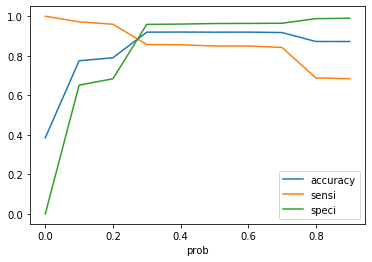

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [86]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Sl No.,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.230507,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.069645,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000963,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.792456,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.984182,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Assigning Lead Score

In [87]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Sl No.,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.230507,3009,0,1,1,1,0,0,0,0,0,0,0,0,23
1,0,0.069645,1012,0,1,0,0,0,0,0,0,0,0,0,0,7
2,0,0.000963,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.792456,4750,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.984182,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [88]:
# Let's check the overall accuracy.
accuracy_03 = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
accuracy_03
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
sensitivity_03 = TP / float(TP+FN)
sensitivity_03

0.856909239574816

In [90]:
# Let us calculate specificity
specificity_03 = TN / float(TN+FP)
specificity_03

0.9587708066581306

In [91]:
# Calculate false postive rate - predicting churn when customer does not have churned
FPR_03 = FP/ float(TN+FP)
FPR_03

0.0412291933418694

In [92]:
# Positive predictive value 
PPV_03 = TP / float(TP+FP)
PPV_03

0.9286663712893221

In [93]:
# Negative predictive value
NPV_03 = TN / float(TN+ FN)
NPV_03

0.9145090376160234

## Precision and Recall

In [94]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3761,  144],
       [ 368, 2078]], dtype=int64)

In [95]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9351935193519352

In [96]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8495502861815208

Using sklearn utilities for the same

### Precision and recall tradeoff

In [97]:
from sklearn.metrics import precision_recall_curve

In [98]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

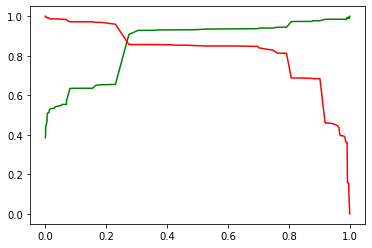

In [99]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [100]:
from sklearn.metrics import precision_score, recall_score
precision_03 = precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
precision_03

0.9286663712893221

In [101]:
recall_03 = recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
recall_03

0.856909239574816

### Making predictions on the test set

In [102]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
       'Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit',
                                                                                                  'Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
3271,0,0,0.284772,-0.600595,0.955505,-0.159171,-0.134368,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1490,0,0,0.643547,1.887326,1.510766,-1.132123,2.115291,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7936,0,0,-0.432779,-0.752879,-0.155018,1.786733,-0.884254,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4216,0,0,-1.150329,-0.888650,-1.265540,0.813781,-0.884254,0,1,0,...,0,0,0,0,0,0,1,0,1,0
3830,0,0,1.719873,-0.587751,2.066027,-0.159171,-0.134368,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [103]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent,Asymmetrique Activity Index_03.Low
3271,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [104]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [105]:
y_test_pred = res.predict(X_test_sm)

In [106]:
y_test_pred[:10]

3271    0.230507
1490    0.902351
7936    0.230507
4216    0.999373
3830    0.230507
1800    0.902351
6507    0.012141
4821    0.000504
4223    0.997156
4714    0.230507
dtype: float64

In [107]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [108]:
# Let's see the head
y_pred_1.head()

,0
3271,0.230507
1490,0.902351
7936,0.230507
4216,0.999373
3830,0.230507


In [109]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [110]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [111]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [112]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [113]:
# Putting CustID to index
y_test_df['Sl No.'] = y_test_df.index
y_pred_final['Sl No.'] = y_test_df['Sl No.']

In [114]:
y_pred_final.head()

,Converted,Converted_prob,Sl No.
0,0,0.230507,0
1,1,0.902351,1
2,0,0.230507,2
3,1,0.999373,3
4,0,0.230507,4


In [115]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [116]:
y_pred_final.head()

,Converted,Converted_prob,Sl No.,final_predicted,Lead_Score
0,0,0.230507,0,0,23
1,1,0.902351,1,1,90
2,0,0.230507,2,0,23
3,1,0.999373,3,1,100
4,0,0.230507,4,0,23


In [117]:
# Let's check the overall accuracy, correctly predicted labe1s (1,0) out of all available labels.
accuracy_test = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
accuracy_test

0.914799853103195

In [118]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1662,   72],
       [ 160,  829]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# sensitivity -  also known as TPR, predicting as converted when customer actually converted.
sensitivity_test = TP / float(TP+FN)
sensitivity_test

0.8382204246713852

In [121]:
#calculate specificity - predicting as not converted when customer actually also not converted.
specificity_test = TN / float(TN+FP)
specificity_test

0.9584775086505191

In [122]:
# Calculate false postive rate - predicting converted when customer actually not have converted.
FPR_test = (FP/ float(TN+FP))
FPR_test

0.04152249134948097

In [123]:
# positive predictive value  - True Prediction rate out of all Predicted Positives
PPV_test = TP / float(TP+FP)
PPV_test

0.9200887902330743

In [124]:
# Negative predictive value - True Prediction rate out of all Predicted Negatives
NPV_test = TN / float(TN+ FN)
NPV_test

0.9121844127332601

In [125]:
# precision  - same as PPV, True Prediction rate out of all Predicted Positives
precision_test = precision_score(y_pred_final.Converted, y_pred_final.final_predicted)
precision_test

0.9200887902330743

In [126]:
# recall same as sensitivity/TPR, predicting as converted when customer actually converted.
recall_test = recall_score(y_pred_final.Converted, y_pred_final.final_predicted)
recall_test

0.8382204246713852

In [127]:
data = {'Model':['Logistic Regression Prob 0.5', 'Logistic Regression Prob 0.3', 'Logistic Regression Pred Test'], 
        'Accuracy':[accuracy_05, accuracy_03, accuracy_test],
        'Sensitivy':[sensitivity_05, sensitivity_03, sensitivity_test],
        'Specificity':[specificity_05, specificity_03, specificity_test],
        'FPR':[FPR_05, FPR_03, FPR_test],
        'PPV':[PPV_05, PPV_03, PPV_test],
        'NPV':[NPV_05, NPV_03, NPV_test],
        'Precision':[precision_05, precision_03, precision_test],
        'Recall':[recall_05, recall_03, recall_test]}
metrics_df = pd.DataFrame(data)
metrics_df

,Model,Accuracy,Sensitivy,Specificity,FPR,PPV,NPV,Precision,Recall
0,Logistic Regression Prob 0.5,0.919383,0.849550,0.963124,0.036876,0.935194,0.910874,0.935194,0.849550
1,Logistic Regression Prob 0.3,0.919540,0.856909,0.958771,0.041229,0.928666,0.914509,0.928666,0.856909
2,Logistic Regression Pred Test,0.914800,0.838220,0.958478,0.041522,0.920089,0.912184,0.920089,0.838220


In [128]:
train_pred = y_train_pred_final.copy()
test_pred = y_pred_final.copy()

In [129]:
train_pred = train_pred.drop(['predicted', 0.0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],axis = 1)
train_pred.head()

,Converted,Converted_prob,Sl No.,final_predicted,Lead_Score
0,0,0.230507,3009,0,23
1,0,0.069645,1012,0,7
2,0,0.000963,9226,0,0
3,1,0.792456,4750,1,79
4,1,0.984182,7987,1,98


In [130]:
test_pred.head()

,Converted,Converted_prob,Sl No.,final_predicted,Lead_Score
0,0,0.230507,0,0,23
1,1,0.902351,1,1,90
2,0,0.230507,2,0,23
3,1,0.999373,3,1,100
4,0,0.230507,4,0,23


In [131]:
Final_df = pd.concat([train_pred,test_pred],axis=0)
Final_df.set_index(['Sl No.'],inplace=True)
Final_df.head()

,Converted,Converted_prob,final_predicted,Lead_Score
Sl No.,,,,
3009,0,0.230507,0,23
1012,0,0.069645,0,7
9226,0,0.000963,0,0
4750,1,0.792456,1,79
7987,1,0.984182,1,98
